## Regresão Linear


Quando queremos representar dados experimentais, observacionais ou estatisticos utilizando uma forma matemática devemos recorrer aos métodos de ajustes de curva.  A regressão linear é o procedimento mais simples, pois, como o nome indica, iremos ajustar os dados a uma linha reta. Assim, para um conjunto de pontos 

$$
{\rm dados} = \left[(x_0,y_0),(x_1,y_1),\ldots,(x_n,y_n)\right],
$$

vamos encontrar a função

$$
y = f(x) = a_0 +a_1 x
$$

que melhor ajuste nossos dados. 

O método mais comúm é o método so mínimos quadrados, vejamos de que se trata. 

<img src="Figs/ajuste.png" width=50% >

Como se ve na figura, para cada ponto no eixo horizontal, $x_i$, existe um erro entre o ponto $y_i$ e a função $f(x_i)$ correspondente. A somatoria desse erro está dado por

$$
E_c = \sum_{i=1}^n (y_i-f(x_i))^2
$$

O ajuste de minimos quadrados tenta minimizar a soma dos quadrados dos residuos, $E_c$, que para o caso vai se uma função de $a_0$ e de $a_1$,

$$
E_c(a_0,a_1) = \sum_{i=1}^n (y_i-a_0-a_1 x_i)^2
$$

Como é de nosso interesse minimizar o valor de $E_c$ escolhendo os melhores valores de $a_0$ e $a_1$, podemos considerar a condição matemática para encontrar um mínimo com respeito a uma ou várias variáveis:

$$
\nabla E_c(a_0,a_1) = \left(\frac{\partial E_c}{\partial a_0},\frac{\partial E_c}{\partial a_1}\right) = (0,0)
$$

Lembremos que a derivada de uma função qualquer com respeito a uma variável independente é nula no ponto mínimo.  O procedimento apresentado no quadro leva finalmente ao sistema de equações:  

$$
\begin{bmatrix} (n) & \sum x_i \\ \sum x_i & \sum x_i^2 \end{bmatrix}\begin{bmatrix} a_0 \\ a_1 \end{bmatrix} = \begin{bmatrix} \sum y_i \\ \sum x_i y_i \end{bmatrix},
$$

onde todas as sumatorias vão de $1$ a $n$, correspondente ao número de pontos amostrados. 

O resultado final é:

$$
\begin{equation}
    \begin{bmatrix}a_0 \\ a_1 \end{bmatrix} = 
        \begin{bmatrix} 
        \frac{\sum y_i \sum x_i^2 - \sum x_i \sum x_i y_i}
        {n \sum x_i^2 - \left(\sum x_i \right)^2} \\ 
        \frac{n \sum x_i y_i - \sum x_i \sum y_i}
        {n \sum x_i^2 - \left(\sum x_i \right)^2} 
    \end{bmatrix}
\end{equation}
$$

### Coeficiente de correlação

O coeficiente de correlação, $R^2$ é uma quantidade que nos informa a qualidade do ajuste de mínimos quadrados aos dados originais.  $R^2$ é calculado da seguinte forma:

$$
  R^2 = \frac{n \sum x_i y_i - \sum x_i \sum y_i}
    {\sqrt{\left(n \sum x_i^2 - \left(\sum x_i \right)^2 \right) 
    \left( n \sum y_i^2 - \left(\sum y_i \right)^2\right)}}
$$

Ele mede a proporção de valores $ n \sum y_i^2 - \left(\sum y_i \right)^2$ que são considerados na regressão.  O coeficiente de correlação pode tomar valores entre $-1$ e $1$. Quanto mais próximo de $-1$ ou $1$, melhor o ajuste dos dados na regressão linear. 

<img src="Figs/correlation-coefficient.png" width=70% >

Seguem abaixo funções para obter os valores $a_0$ e $a_1$ do ajuste linear, assim como $R^2$.

In [11]:
# importamos as bibliotecas necessarias
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# Esta função calcula todas as somas para calcular a0, a1 e R2
# 
def sums(dados):
    [X,Y,XX,YY,XY] = [0.0,0.0,0.0,0.0,0.0]
    for p in dados:
        X += p[0]
        Y += p[1]
        XX += pow(p[0],2.0)
        YY += pow(p[1],2.0)
        XY += p[0]*p[1]
    return [X,Y,XX,YY,XY]

In [20]:
# função que calcula os coeficientes para o ajuste
# linear de mínimos quadrados

def linear_lsf(dados,**args):
    [X,Y,XX,YY,XY] = sums(dados)
    m = len(dados)
    a0 = (Y*XX-X*XY)/(m*XX-X*X)
    a1 = (m*XY-X*Y)/(m*XX-X*X)    
    return a0,a1

def linear_f(x):
    a0,a1 = linear_lsf(dados)
    return a0+a1*x

## funcion que calcula el coeficiente de correlación
def R2(dados):
    import math as mt
    [X,Y,XX,YY,XY] = sums(dados)
    m = len(dados)
    return (m*XY-X*Y)/(mt.sqrt((m*XX-X*X)*(m*YY-Y*Y)))

In [36]:
# Conjunto de dados para exemplo 

dados = [(1.0, 1.3), (2.0, 3.5), (3.0, 4.2), (4.0, 5.0), (5.0, 7.0),(6.0, 8.8), (7.0, 10.1), (8.0, 12.5), (9.0, 13.0)]
a0, a1 = linear_lsf(dados)
r2 = R2(dados) # coeficiente de correlacao
print('a_0 = ', a0)
print('a_1 = ', a1)
print('R^2 = ', r2)
x = np.linspace(-2,9,100)
y = linear_f(x) # modelo lineal


a_0 =  -0.18333333333333332
a_1 =  1.4899999999999998
R^2 =  0.993186205533766


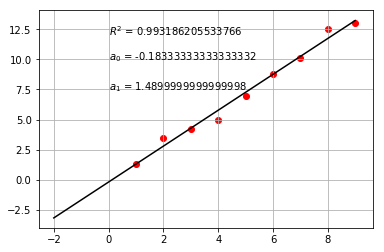

In [34]:
# Graficamos o resultado
plt.text(0,12,r'$R^2$ = '+str(r2))
plt.text(0,10,r'$a_0$ = '+str(a0))
plt.text(0,7.5,r'$a_1$ = '+ str(a1))
plt.plot(x,y,'k')
for p in dados:
    plt.scatter(p[0],p[1],c='r')
plt.grid(True)

### Verificação do calculo de $R^2$

Vamos degradar os nossos dados para comparar o coeficiente de correlação de um ajuste bom com um ajuste ruim. Para isso utilizamos um ruido randomico

In [51]:
m = len(dados)
amp = 2.
ruido = np.random.normal(0,amp,m)
dados_com_ruido = []
for i,p in enumerate(dados):
    dados_com_ruido.append((p[0],p[1]+ruido[i]))

In [52]:
dados_com_ruido

[(1.0, 0.8196932536471138),
 (2.0, 1.330134751527266),
 (3.0, 1.3077160381056663),
 (4.0, 3.2408838817254697),
 (5.0, 5.084357951723823),
 (6.0, 10.767680156953347),
 (7.0, 10.755410993033092),
 (8.0, 11.894143866362942),
 (9.0, 10.2346275312637)]

In [54]:
# Calculamos novamente o ajuste para os dados com ruido
a0, a1 = linear_lsf(dados_com_ruido)
r2 = R2(dados_com_ruido) # coeficiente de correlacao
print('a_0 = ', a0)
print('a_1 = ', a1)
print('R^2 = ', r2)
x = np.linspace(-2,9,100)
y = linear_f(x) # modelo lineal

a_0 =  -1.8217571728555144
a_1 =  1.5962325106676012
R^2 =  0.9296228039016992


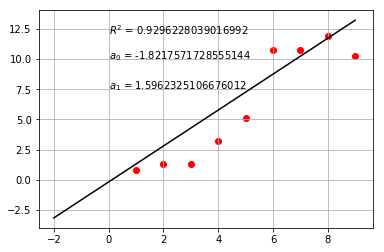

In [55]:
# Graficamos o resultado
plt.text(0,12,r'$R^2$ = '+str(r2))
plt.text(0,10,r'$a_0$ = '+str(a0))
plt.text(0,7.5,r'$a_1$ = '+ str(a1))
plt.plot(x,y,'k')
for p in dados_com_ruido:
    plt.scatter(p[0],p[1],c='r')
plt.grid(True)